## Contents of this notebook: 

### 1. Import libraries and API key

### 2. Examine data

### 3. Time-series analysis: decomposition

### 4. Testing for stationarity

### 5. Stationarizing the data


### 1. Import libraries and API key

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '-t6Lnm_UyoPPMpWnDX3V'

I couldn't find a data set that went with my other data in these exercises, so I went with the Big Mac Index, something I have used with students to help them understand inflation and currency exchange in the past. 

In [3]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('ECONOMIST/BIGMAC_UKR')

### 2. Examine data

In [5]:
data.head()

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2000-04-30,0.00,0.0000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2001-04-30,0.00,0.0000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2002-04-30,0.00,0.0000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2003-04-30,0.00,0.0000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2004-05-31,7.25,5.3315,1.359842,2.5,-53.108881,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(36, 10)

In [7]:
data.columns

Index(['local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [9]:
data['local_price'].value_counts(dropna = False)

0.00     5
19.00    5
57.00    2
14.00    2
7.25     2
39.00    1
65.00    1
62.00    1
59.00    1
54.00    1
50.00    1
47.00    1
44.00    1
42.00    1
34.00    1
36.00    1
15.00    1
17.00    1
16.50    1
14.50    1
11.00    1
9.25     1
9.00     1
8.50     1
69.00    1
Name: local_price, dtype: int64

In [10]:
type(data)

pandas.core.frame.DataFrame

In [37]:
# I'm just going to use the time and local_price columns

#I didn't subset the data because 2000-present is all relevant and pretty recent and should be interesting. 

data1 = data.drop(columns = ['dollar_ex', 'dollar_price', 'dollar_ppp', 'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'])

In [13]:
data1.head()

,local_price
Date,
2000-04-30,0.00
2001-04-30,0.00
2002-04-30,0.00
2003-04-30,0.00
2004-05-31,7.25


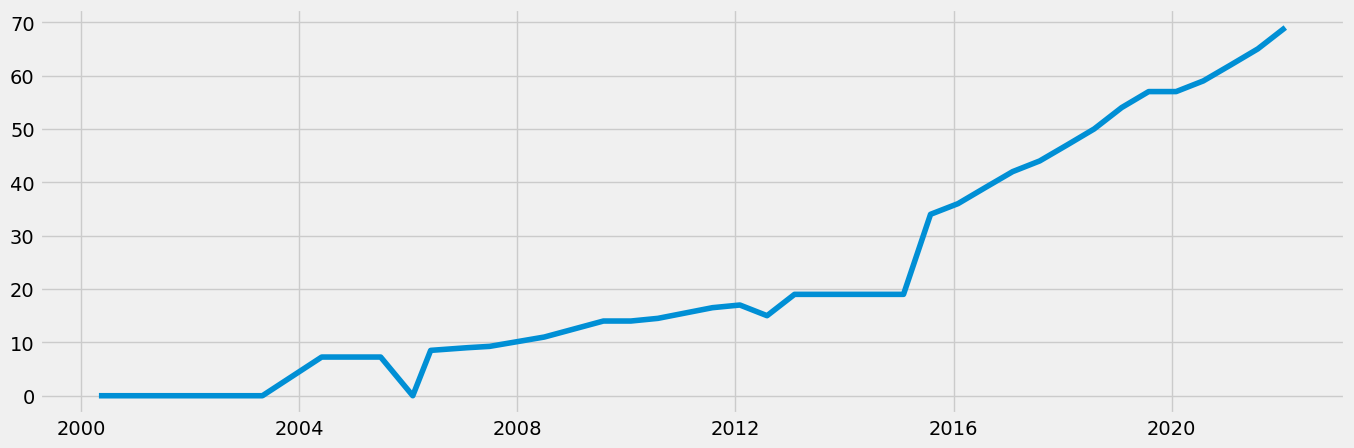

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data1)

In [16]:
#check for null values
data1.isnull().sum() 

local_price    0
dtype: int64

In [17]:
# Check for duplicates

dups = data1.duplicated()
dups.sum()


11

In [18]:
dups.head()

Date
2000-04-30    False
2001-04-30     True
2002-04-30     True
2003-04-30     True
2004-05-31    False
dtype: bool

In [19]:
#not really dups 

### 3. Time-series analysis: decomposition

In [21]:
# Decompose the time series using an additive model

#it looks more linear than exponential so additive seems like the right model

#this threw up a crazy error so I checked stack overflow and they suggested adding 'period = 1'

decomposition = sm.tsa.seasonal_decompose(data1, model='additive', period = 1)

In [22]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

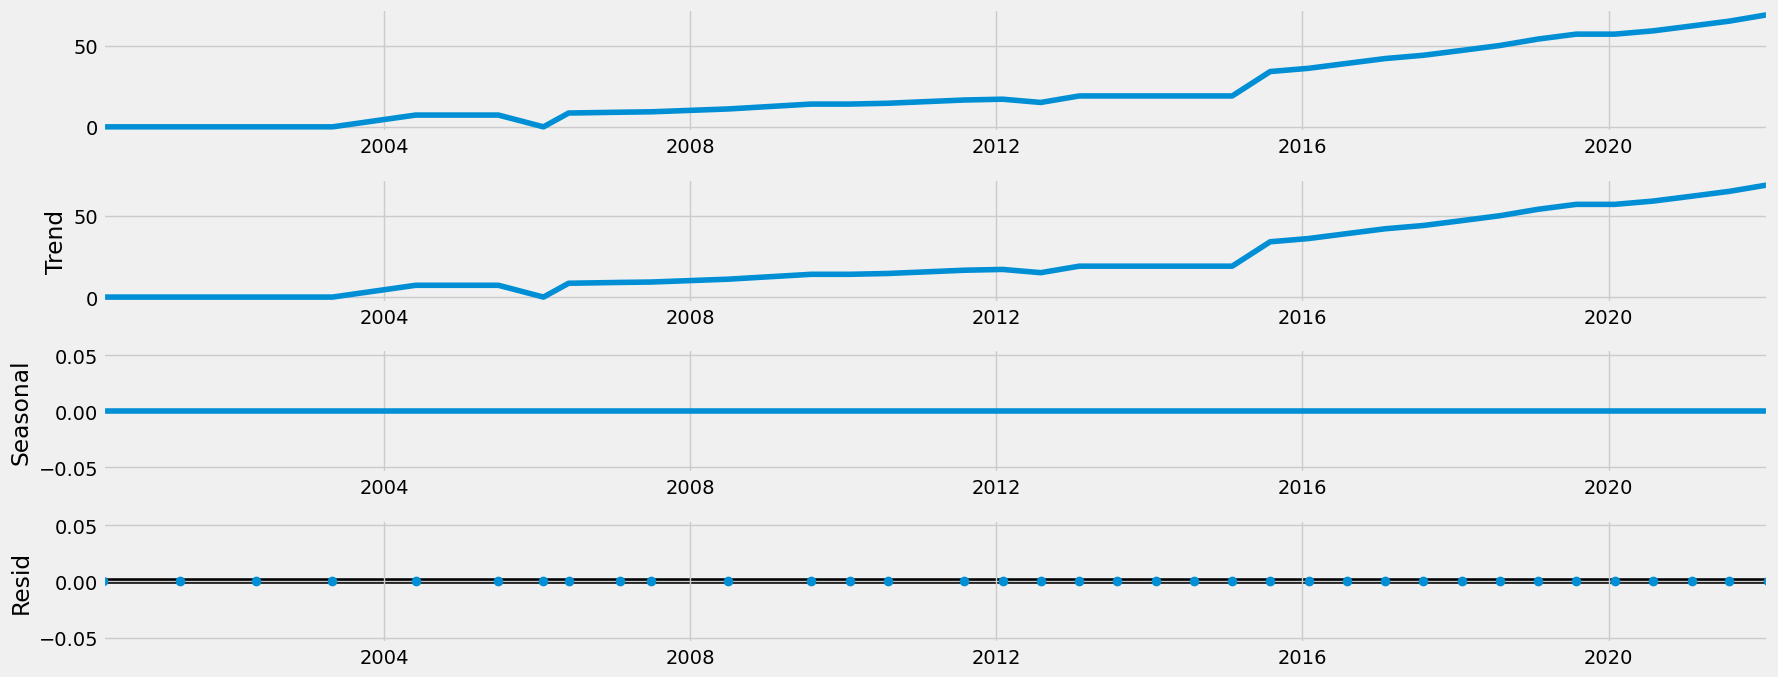

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

Interpretation:

The trend is still upward.
There doesn't appear to be anything seasonal in this trend.
There is some noise here and there but not a lot any place in particular.

### 4. Testing for stationarity

In [25]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function


In [26]:
# I got a weird error so I'm going through this section by section 


def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


In [27]:
# Apply the test using the function on the time series
dickey_fuller(data1['Value'])

KeyError: 'Value'

In [28]:
#I don't know how to fix that so I looked up another way to get the info

X = data1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.862426
p-value: 0.992580
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


the p-value is well above .05 so this is not a significant result

the ADF statistic is .8 but the 5% and 10% values are -2.9 and -2.6 which is much smaller, so we can't rejct the null hypothesis yet 

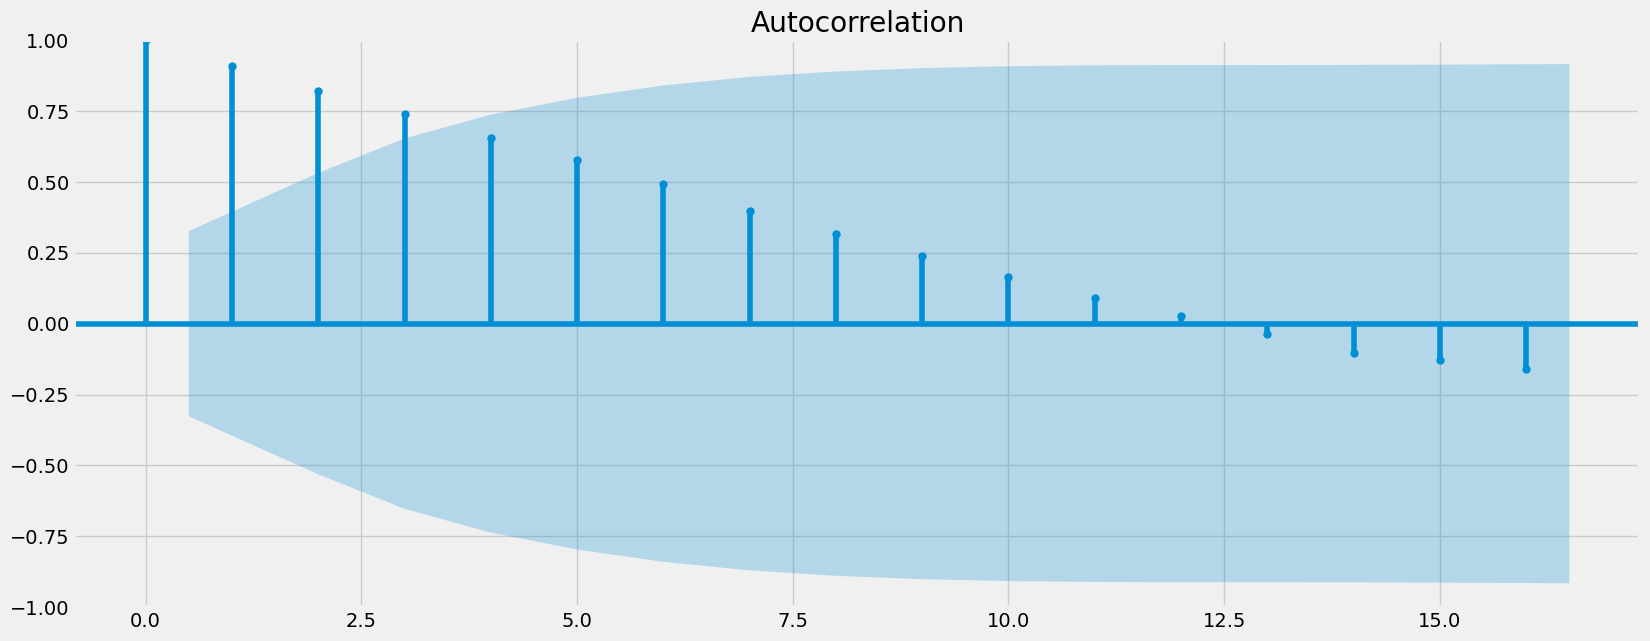

In [29]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data1)
plt.show()

Only 4 of these lines are outside the confidence interval, so actually this seems okay? I'm going to follow the remaining steps anywa though.

### 5. Stationarizing the data

In [30]:
data_diff = data1 - data1.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [31]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [32]:
data_diff.head()

,local_price
Date,
2001-04-30,0.00
2002-04-30,0.00
2003-04-30,0.00
2004-05-31,7.25
2005-06-30,0.00


In [33]:
data_diff.columns

Index(['local_price'], dtype='object')

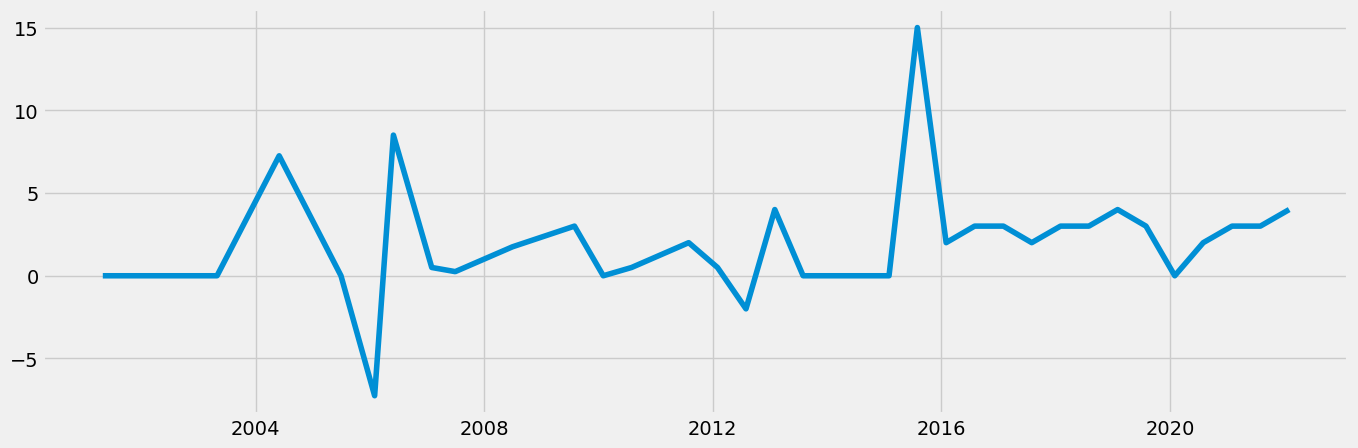

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

The upward trend is gone but there's a lot more up and down movement. Interesting!

In [35]:
X = data_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.790752
p-value: 0.000000
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


Here we go, the ADF statistic of -6 is much smaller than the -2 for 5% and 10% so this should work this time, also the p-value is zero.

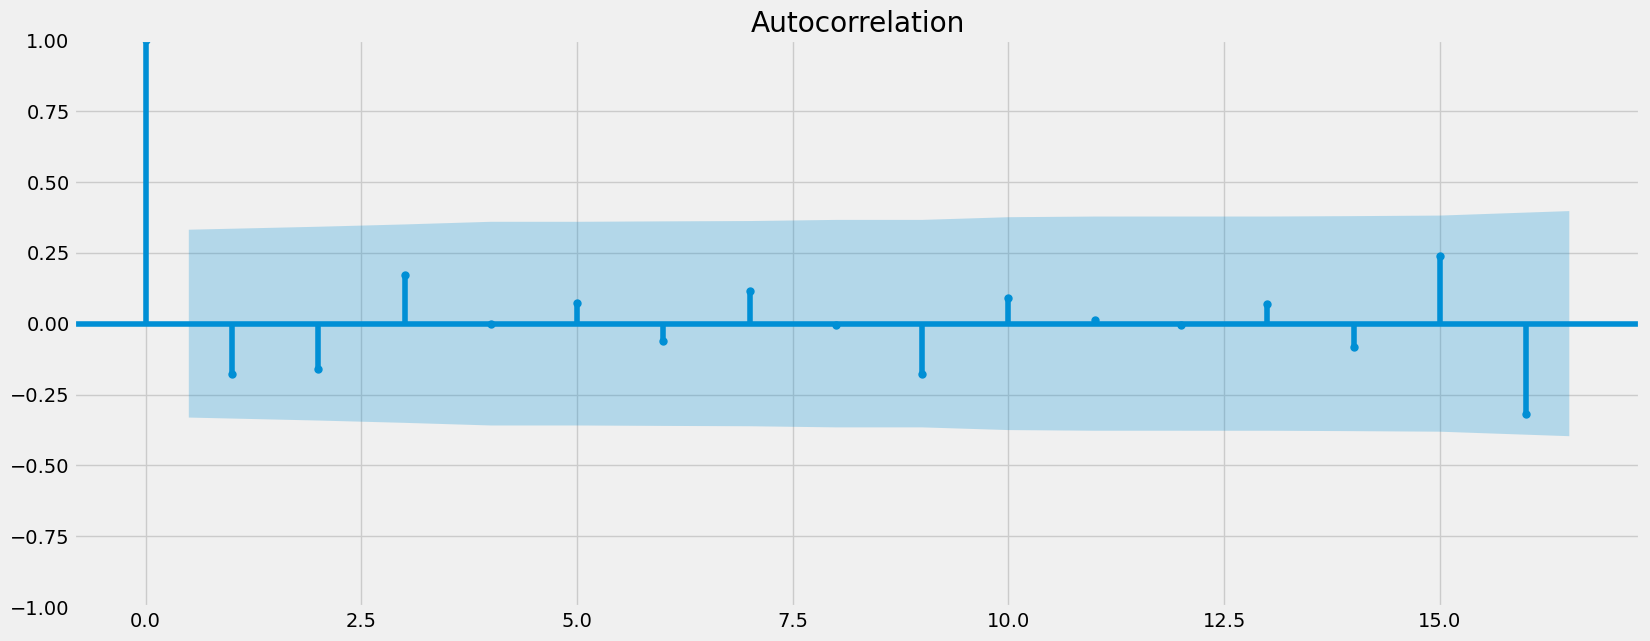

In [36]:
plot_acf(data_diff)
plt.show()

Now there's only one value outside the confidence interval so I should be good